In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

ImportError: numpy.core.multiarray failed to import

In [2]:
results_230112 = pd.read_csv('D:\\SNUlab\\IV_OHCA\\sub\\results_230112.csv', encoding = 'euc-kr')
results_230112

,Unnamed: 0,date,air_out_idx,SO2,CO,O3,NO2,pm10_day_mean,pm25_day_mean,so2_AQI,...,wday_4,wday_5,wday_6,wday_7,AQI_lag0_lag1,AQI_lag0_lag2,AQI_lag0_lag3,IV_300_BI_lag0_lag1,IV_300_BI_lag0_lag2,IV_300_BI_lag0_lag3
0,1,2009-01-04,2,0.019,1.9,0.002,0.089,42.791667,22.208333,28,...,0,0,0,0,87.416665,86.111110,74.500000,1.0,1.000000,0.75
1,2,2009-01-04,3,0.011,0.9,0.002,0.056,57.541667,25.458333,16,...,0,0,0,0,56.833335,54.500000,50.208332,1.0,1.000000,0.75
2,3,2009-01-04,5,0.015,1.4,0.003,0.045,53.304348,31.434783,22,...,0,0,0,0,76.000000,73.277777,66.583332,1.0,1.000000,0.75
3,4,2009-01-04,6,0.008,1.4,0.003,0.045,53.636364,29.791667,12,...,0,0,0,0,77.000000,72.722223,66.875000,1.0,1.000000,0.75
4,5,2009-01-04,27,0.011,1.7,0.001,0.069,34.833333,16.200000,16,...,0,0,0,0,74.583335,63.944447,57.875003,1.0,1.000000,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87794,87795,2019-12-31,168,0.002,0.4,0.016,0.024,26.521739,11.913043,3,...,0,0,0,0,42.500000,44.111110,46.083332,0.0,0.333333,0.50
87795,87796,2019-12-31,177,0.003,0.4,0.022,0.011,24.000000,12.583333,5,...,0,0,0,0,39.083335,38.888890,39.083335,0.0,0.333333,0.50
87796,87797,2019-12-31,196,0.003,0.4,0.020,0.016,26.500000,18.791667,5,...,0,0,0,0,43.500000,45.833333,47.291668,0.0,0.333333,0.50
87797,87798,2019-12-31,197,0.002,0.4,0.023,0.011,25.666667,18.041667,3,...,0,0,0,0,42.416665,44.000000,45.833332,0.0,0.333333,0.50


In [3]:
for cols in results_230112.columns: 
    print(cols)

Unnamed: 0
date
air_out_idx
SO2
CO
O3
NO2
pm10_day_mean
pm25_day_mean
so2_AQI
co_AQI
o3_AQI
no2_AQI
pm10_AQI
pm25_AQI
AQI
temp_mean_total
rain_sum
pressure_mean
yday
wday
ns.basis_temp.v1.l1
ns.basis_temp.v1.l2
ns.basis_temp.v1.l3
ns.basis_temp.v1.l4
ns.basis_temp.v2.l1
ns.basis_temp.v2.l2
ns.basis_temp.v2.l3
ns.basis_temp.v2.l4
ns.basis_temp.v3.l1
ns.basis_temp.v3.l2
ns.basis_temp.v3.l3
ns.basis_temp.v3.l4
ns.basis_yday.v1.l1
ns.basis_yday.v2.l1
ns.basis_yday.v3.l1
ns.basis_pressure.v1.l1
ns.basis_pressure.v2.l1
ns.basis_pressure.v3.l1
IV_300
IV_500
IV_700
IV_300_BI
법정동코드
P_ADD_CITY_DIST
count
count_disease
count_non_disease
count_non_disease_traffic
count_disease_male
count_disease_female
count_disease_above70
count_disease_under70
count_disease_Mhistory_0
count_disease_Mhistory_1
count_disease_cardiogenic
count_disease_breathability
count_disease_SuddenInfantDeath
SIGUNGU_CD
SIGUNGU_NM
check.수도권.1.
location
AQI_lag1
AQI_lag2
AQI_lag3
IV_300_BI_lag1
IV_300_BI_lag2
IV_300_BI_lag3
caus

In [41]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\IV_OHCA\\supple_table1_data.xlsx')

In [2]:
data = pd.read_excel('D:\\SNUlab\\1. Results\\IV_OHCA\\supple_table2_data.xlsx')

In [3]:
data

,Design,Type,Lag 0,Lag0_conf_min,Lag0_conf_max,Lag 1,Lag1_conf_min,Lag1_conf_max,Lag 2,Lag2_conf_min,...,Lag3_conf_max,Lag 0-1,Lag0_1_conf_min,Lag0_1_conf_max,Lag 0-2,Lag0_2_conf_min,Lag0_2_conf_max,Lag 0-3,Lag0_3_conf_min,Lag0_3_conf_max
0,Multivariate (without IV),Total,0.990,0.970,1.000,1.000,0.980,1.020,0.990,0.980,...,0.990,0.990,0.970,1.010,0.990,0.970,1.010,0.980,0.960,1.000
1,Multivariate (without IV),Male,0.980,0.960,1.000,1.000,0.980,1.020,0.990,0.970,...,0.990,0.990,0.960,1.010,0.980,0.960,1.010,0.970,0.940,1.000
2,Multivariate (without IV),Female,1.000,0.970,1.030,1.010,0.980,1.030,1.000,0.980,...,1.010,1.000,0.970,1.030,1.000,0.970,1.040,1.000,0.960,1.030
3,Case-Crossover,Total,1.000,0.980,1.020,1.000,0.980,1.020,0.990,0.980,...,0.990,1.000,0.980,1.020,0.990,0.970,1.020,0.980,0.960,1.010
4,Case-Crossover,Male,1.010,0.980,1.040,1.010,0.980,1.040,1.000,0.970,...,1.010,1.010,0.980,1.050,1.010,0.970,1.050,1.000,0.960,1.040
5,Case-Crossover,Female,1.000,0.970,1.020,0.990,0.970,1.010,0.990,0.970,...,0.990,0.990,0.960,1.020,0.990,0.960,1.020,0.970,0.940,1.000
6,Negative Control,Total,1.046,0.902,1.212,1.013,0.870,1.180,1.003,0.875,...,1.054,1.043,0.884,1.231,1.037,0.874,1.231,0.982,0.818,1.179
7,Negative Control,Male,1.089,0.911,1.302,0.996,0.825,1.203,1.045,0.882,...,1.047,1.061,0.868,1.298,1.082,0.880,1.331,0.995,0.796,1.244
8,Negative Control,Female,0.966,0.747,1.249,1.043,0.809,1.344,0.927,0.738,...,1.231,1.006,0.755,1.340,0.953,0.709,1.283,0.954,0.699,1.302


table 1 preprocess

In [ ]:
# display를 위해, 0.8 이하는 0.8로 대체
# 1.5 이상은 1.5로 대체

data2 = data.loc[:, data.columns.isin(['Type']) == False].copy()
data2[data2 <= 0.8] = 0.82
data2[data2 >= 1.5] = 1.48

data = pd.concat([data['Type'], data2], axis = 1)

table 2 preprocess

In [4]:
# display를 위해, 0.8 이하는 0.8로 대체
# 1.5 이상은 1.5로 대체

data2 = data.loc[:, data.columns.isin(['Type', 'Design']) == False].copy()
data2[data2 <= 0.8] = 0.82
data2[data2 >= 1.5] = 1.48

data = pd.concat([data['Design'], data['Type'], data2], axis = 1)

In [5]:
# check min, max (잘 대체되었는지 확인)
data_tmp = data.drop(['Type', 'Design'], axis = 1)
max_value = data_tmp.max().max()
min_value = data_tmp.min().min()
max_value

1.344

### Main Figure (table 1)

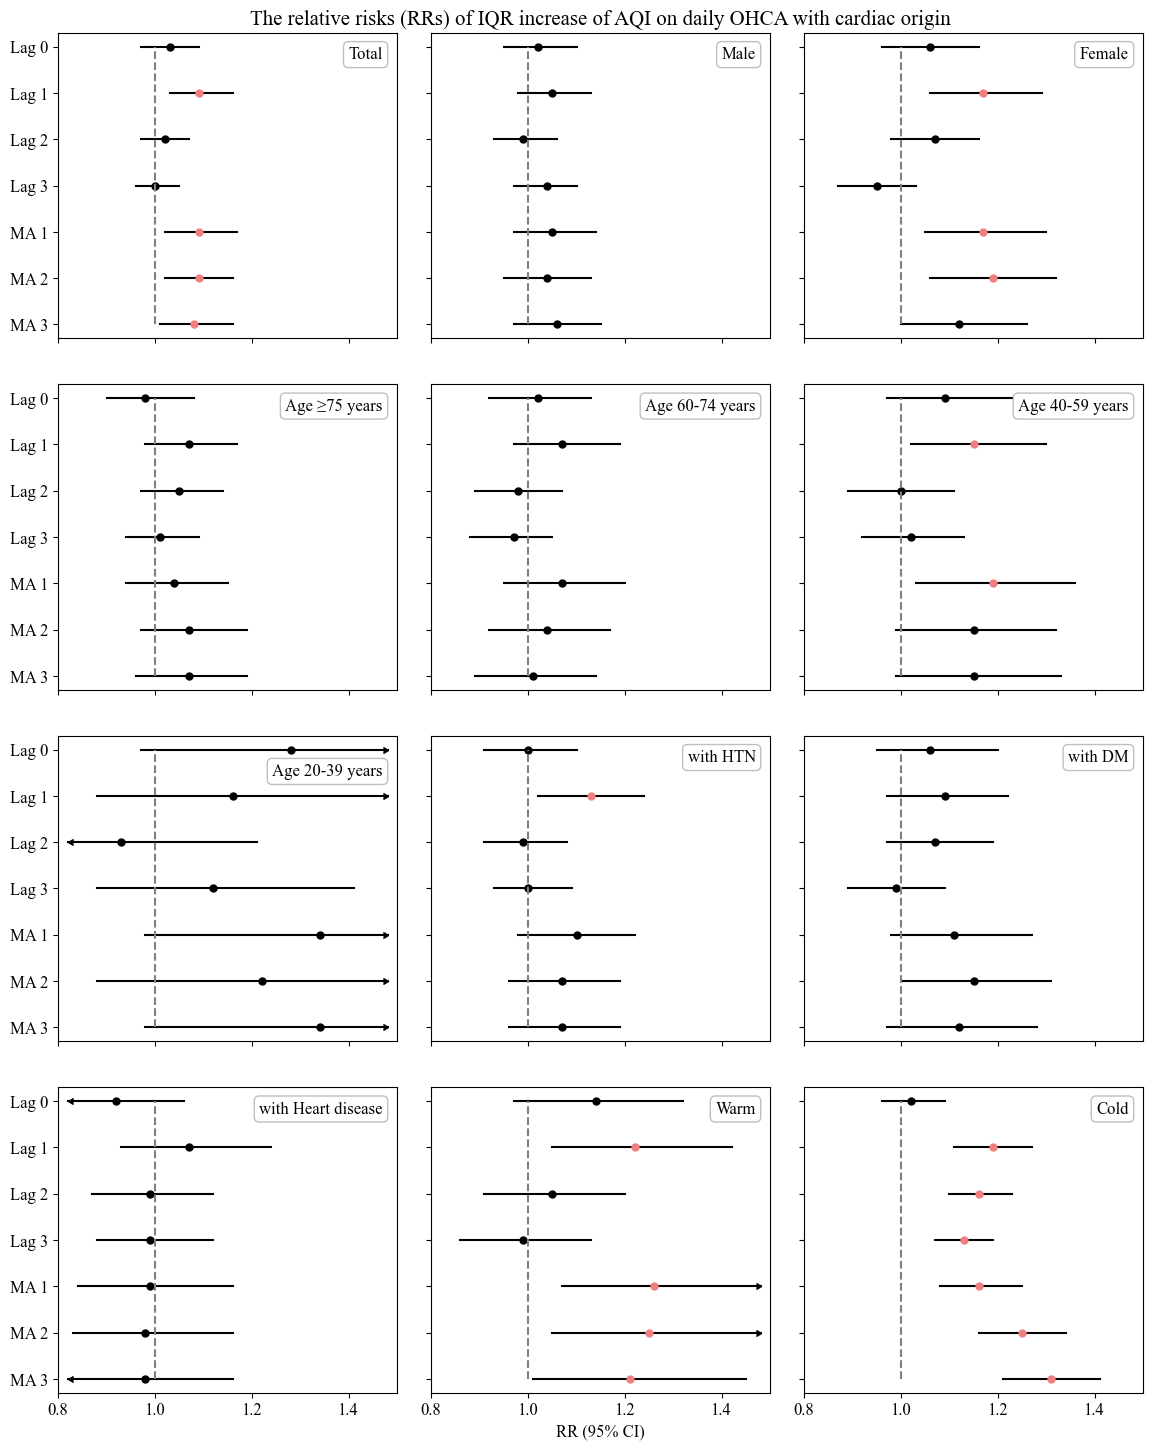

In [43]:
# 0109 수정사항 반영
# MA2 도 포함하여 그려주셔요 -> done
# X축을 0.8-1.5로 짤라주셔요 (예시 그래프와 같이 짤리는 bar의 끝부분은 화살표 처리 부탁드려요) -> done
# 왼쪽에 lag 0,1,2,3,01,02,03 숫자 표기 + 밑에 X축 0.8-1.5 숫자표기 1번만 > 그래프 간격 지금보다 좁게 + x축/y축 글자 크기 크게 해주쇼요 (예시 그래프 참조) -> done
# 유의한 (1 끼지 않은) 애들만 지금처럼 빨간 쩜 해주시고 나머지 유의하지 않은 애들 (1낀 애들) 은 쩜 다 검정색으로 해주세요 -> done
# 그래프 이름( 오른쪽 상단의 male, female 등..) 글자 크기 키워주셔요 -> done

# 0112 수정사항 반영
# Lag 0-1... -> MA 1 등으로 수정
# without IV subplot 삭제

plt.rcParams['font.family'] = 'Times New Roman'

# Create figure and add axes object
fig = plt.figure(figsize=(14, 17)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_xlabel('RR (95% CI)', fontsize = 12)
plt.title('The relative risks (RRs) of IQR increase of AQI on daily OHCA with cardiac origin', fontsize = 15)

ax1 = fig.add_subplot(4, 3, 1)
ax2 = fig.add_subplot(4, 3, 2)
ax3 = fig.add_subplot(4, 3, 3)
ax4 = fig.add_subplot(4, 3, 4)
ax5 = fig.add_subplot(4, 3, 5)
ax6 = fig.add_subplot(4, 3, 6)
ax7 = fig.add_subplot(4, 3, 7)
ax8 = fig.add_subplot(4, 3, 8)
ax9 = fig.add_subplot(4, 3, 9)
ax10 = fig.add_subplot(4, 3, 10)
ax11 = fig.add_subplot(4, 3, 11) 
ax12 = fig.add_subplot(4, 3, 12)
# ax13 = fig.add_subplot(5, 3, 13)
# ax14 = fig.add_subplot(5, 3, 14)
# ax15 = fig.add_subplot(5, 3, 15)

# font size
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Total
data_total = data.loc[data['Type'] == 'Total'] # change here
type = 'Total' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax1.plot((lower,upper),(y,y), color='black')
    if lower[0] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[0] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[0] <= 1 and upper[0] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax1.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax1.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax1.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax1.set_yticks(range(len(dataset)),list(dataset['category']))
ax1.yaxis.set_ticklabels(['MA 3', 'MA 2', 'MA 1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0'])
ax1.xaxis.set_ticklabels([])
ax1.set_xlim([0.8, 1.5])
ax1.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax1.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax1.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Male
data_total = data.loc[data['Type'] ==  'Male'] # change here
type =  'Male' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax2.plot((lower,upper),(y,y), color='black')
    if lower[1] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[1] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[1] <= 1 and upper[1] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax2.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax2.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax2.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax2.set_yticks(range(len(dataset)),list(dataset['category']))
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax2.set_xlim([0.8, 1.5])
ax2.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax2.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax2.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Female
data_total = data.loc[data['Type'] ==  'Female'] # change here
type =  'Female' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax3.plot((lower,upper),(y,y), color='black')
    if lower[2] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[2] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[2] <= 1 and upper[2] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax3.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax3.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax3.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax3.set_yticks(range(len(dataset)),list(dataset['category']))
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax3.set_xlim([0.8, 1.5])
ax3.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax3.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax3.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# >=75
data_total = data.loc[data['Type'] ==  '>=75'] # change here
type =  'Age ≥75 years' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax4.plot((lower,upper),(y,y), color='black')
    if lower[3] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[3] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[3] <= 1 and upper[3] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax4.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax4.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax4.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax4.set_yticks(range(len(dataset)),list(dataset['category']))
ax4.yaxis.set_ticklabels(['MA 3', 'MA 2', 'MA 1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0'])
ax4.xaxis.set_ticklabels([])
ax4.set_xlim([0.8, 1.5])
ax4.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax4.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax4.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# 60-74
data_total = data.loc[data['Type'] ==  '60-74'] # change here
type =  'Age 60-74 years' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax5.plot((lower,upper),(y,y), color='black')
    if lower[4]<= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[4] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[4] <= 1 and upper[4] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax5.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax5.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax5.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax5.set_yticks(range(len(dataset)),list(dataset['category']))
ax5.xaxis.set_ticklabels([])
ax5.yaxis.set_ticklabels([])
ax5.set_xlim([0.8, 1.5])
ax5.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax5.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax5.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# 40-59
data_total = data.loc[data['Type'] ==  '40-59'] # change here
type =  'Age 40-59 years' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax6.plot((lower,upper),(y,y), color='black')
    if lower[5] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[5] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[5] <= 1 and upper[5] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax6.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax6.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax6.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax6.set_yticks(range(len(dataset)),list(dataset['category']))
ax6.xaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])
ax6.set_xlim([0.8, 1.5])
ax6.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax6.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax6.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# 20-39
data_total = data.loc[data['Type'] ==  '20-39'] # change here
type =  'Age 20-39 years' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax7.plot((lower,upper),(y,y), color='black')
    if lower[6] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[6] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[6] <= 1 and upper[6] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax7.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax7.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax7.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax7.set_yticks(range(len(dataset)),list(dataset['category']))
ax7.yaxis.set_ticklabels(['MA 3', 'MA 2', 'MA 1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0'])
ax7.xaxis.set_ticklabels([])
ax7.set_xlim([0.8, 1.5])
ax7.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax7.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax7.text(1.47, 5.7, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# with HTN
data_total = data.loc[data['Type'] ==  'HTN'] # change here
type =  'with HTN' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax8.plot((lower,upper),(y,y), color='black')
    if lower[7] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[7] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[7] <= 1 and upper[7] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax8.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax8.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax8.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax8.set_yticks(range(len(dataset)),list(dataset['category']))
ax8.xaxis.set_ticklabels([])
ax8.yaxis.set_ticklabels([])
ax8.set_xlim([0.8, 1.5])
ax8.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax8.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax8.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# with DM
data_total = data.loc[data['Type'] ==  'DM'] # change here
type =  'with DM' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax9.plot((lower,upper),(y,y), color='black')
    if lower[8] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[8] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[8] <= 1 and upper[8] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax9.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax9.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax9.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax9.set_yticks(range(len(dataset)),list(dataset['category']))
ax9.xaxis.set_ticklabels([])
ax9.yaxis.set_ticklabels([])
ax9.set_xlim([0.8, 1.5])
ax9.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax9.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax9.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# with Heart disease
data_total = data.loc[data['Type'] ==  'Heart'] # change here
type = 'with Heart disease' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax10.plot((lower,upper),(y,y), color='black')
    if lower[9] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[9] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[9] <= 1 and upper[9] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax10.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax10.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax10.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax10.set_yticks(range(len(dataset)),list(dataset['category']))
# ax10.xaxis.set_ticklabels([])
ax10.yaxis.set_ticklabels(['MA 3', 'MA 2', 'MA 1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0'])
ax10.set_xlim([0.8, 1.5])
ax10.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax10.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax10.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Warm
data_total = data.loc[data['Type'] ==  'Warm'] # change here
type = 'Warm' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax11.plot((lower,upper),(y,y), color='black')
    if lower[10] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[10] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[10] <= 1 and upper[10] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax11.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax11.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax11.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax11.set_yticks(range(len(dataset)),list(dataset['category']))
# ax11.xaxis.set_ticklabels([])
ax11.yaxis.set_ticklabels([])
ax11.set_xlim([0.8, 1.5])
ax11.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax11.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax11.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Cold
data_total = data.loc[data['Type'] ==  'Cold'] # change here
type = 'Cold' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax12.plot((lower,upper),(y,y), color='black')
    if lower[11] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[11] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[11] <= 1 and upper[11] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax12.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax12.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax12.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax12.set_yticks(range(len(dataset)),list(dataset['category']))
# ax12.xaxis.set_ticklabels([])
ax12.yaxis.set_ticklabels([])
ax12.yaxis.set_ticklabels([])
ax12.set_xlim([0.8, 1.5])
ax12.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax12.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax12.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # Total (w/o IV)
# data_total = data.loc[data['Type'] ==  'Total (w/o IV)'] # change here
# type = 'Total (w/o IV)' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax13.plot((lower,upper),(y,y), color='black')
#     if lower[12] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[12] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[12] <= 1 and upper[12] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax13.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax13.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax13.plot((center),(y), marker='o', markersize=5, color=marker_color)
# ax13.set_yticks(range(len(dataset)),list(dataset['category']))
# ax13.set_xlim([0.8, 1.5])
# ax13.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# # ax13.title.set_text(type)
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax13.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # Male (w/o IV)
# data_total = data.loc[data['Type'] ==  'Male (w/o IV)'] # change here
# type = 'Male (w/o IV)' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax14.plot((lower,upper),(y,y), color='black')
#     if lower[13] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[13] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[13] <= 1 and upper[13] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax14.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax14.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax14.plot((center),(y), marker='o', markersize=5, color=marker_color)
# ax14.set_yticks(range(len(dataset)),list(dataset['category']))
# ax14.yaxis.set_ticklabels([])
# ax14.set_xlim([0.8, 1.5])
# ax14.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# # ax14.title.set_text(type)
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax14.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # Female (w/o IV)
# data_total = data.loc[data['Type'] ==  'Female (w/o IV)'] # change here
# type = 'Female (w/o IV)' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax15.plot((lower,upper),(y,y), color='black')
#     if lower[14] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[14] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[14] <= 1 and upper[14] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax15.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax15.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax15.plot((center),(y), marker='o', markersize=5, color=marker_color)
# # ax15.set_yticks(range(len(dataset)),list(dataset['category']))
# ax15.yaxis.set_ticklabels([])
# ax15.set_xlim([0.8, 1.5])
# ax15.tick_params(axis='x', labelsize=12)
# ax15.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax15.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.15)

plt.savefig('D:\\SNUlab\\1. Results\\IV_OHCA\\figures\\supple1_visualize.png', facecolor = 'w', bbox_inches = "tight") # save 

plt.show()

### Sub figure (table 2)

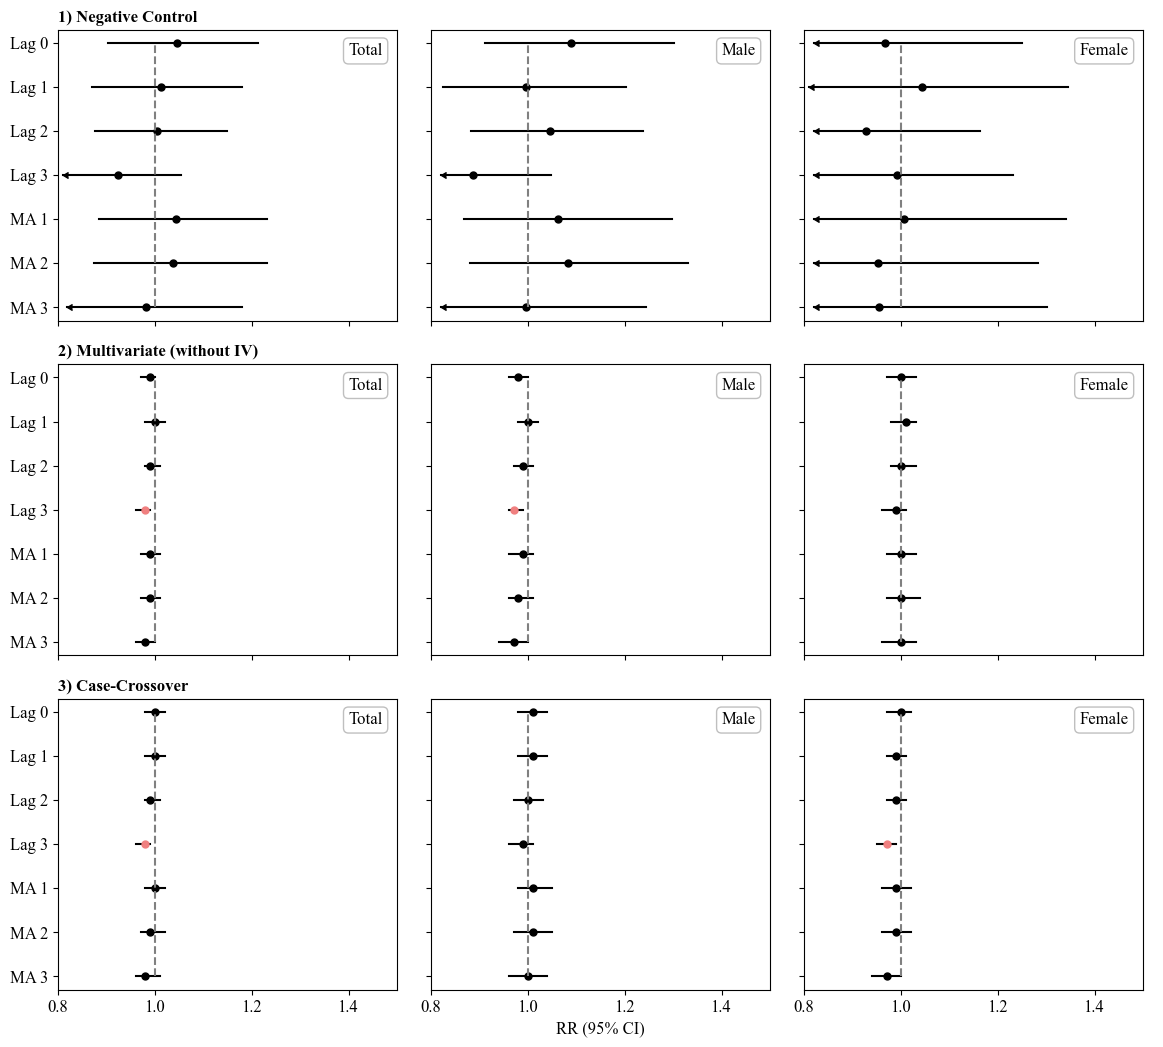

In [13]:
plt.rcParams['font.family'] = 'Times New Roman'

# Create figure and add axes object
fig = plt.figure(figsize=(14, 12)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_xlabel('RR (95% CI)', fontsize = 12)
# plt.title('Temporary title. xxxx xxxx', fontsize = 15)

ax1 = fig.add_subplot(3, 3, 4)
ax2 = fig.add_subplot(3, 3, 5)
ax3 = fig.add_subplot(3, 3, 6)
ax4 = fig.add_subplot(3, 3, 7)
ax5 = fig.add_subplot(3, 3, 8)
ax6 = fig.add_subplot(3, 3, 9)
ax7 = fig.add_subplot(3, 3, 1)
ax8 = fig.add_subplot(3, 3, 2)
ax9 = fig.add_subplot(3, 3, 3)
# ax10 = fig.add_subplot(4, 3, 10)
# ax11 = fig.add_subplot(4, 3, 11) 
# ax12 = fig.add_subplot(4, 3, 12)
# ax13 = fig.add_subplot(5, 3, 13)
# ax14 = fig.add_subplot(5, 3, 14)
# ax15 = fig.add_subplot(5, 3, 15)

# font size
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Multivariate, Total
data_total = data.loc[(data['Design'] == 'Multivariate (without IV)') & (data['Type'] == 'Total')] # change here
ax1.set_title('2) Multivariate (without IV)', loc='left', fontweight = 'bold')
type = 'Total' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax1.plot((lower,upper),(y,y), color='black')
    if lower[0] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[0] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[0] <= 1 and upper[0] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax1.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax1.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax1.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax1.set_yticks(range(len(dataset)),list(dataset['category']))
ax1.yaxis.set_ticklabels(['MA 3', 'MA 2', 'MA 1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0'])
ax1.xaxis.set_ticklabels([])
ax1.set_xlim([0.8, 1.5])
ax1.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax1.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Multivariate, Male
data_total = data.loc[(data['Design'] == 'Multivariate (without IV)') & (data['Type'] == 'Male')] # change here
type =  'Male' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax2.plot((lower,upper),(y,y), color='black')
    if lower[1] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[1] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[1] <= 1 and upper[1] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax2.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax2.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax2.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax2.set_yticks(range(len(dataset)),list(dataset['category']))
ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax2.set_xlim([0.8, 1.5])
ax2.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax2.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax2.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Multivariate, Female
data_total = data.loc[(data['Design'] == 'Multivariate (without IV)') & (data['Type'] == 'Female')] # change here
type =  'Female' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax3.plot((lower,upper),(y,y), color='black')
    if lower[2] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[2] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[2] <= 1 and upper[2] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax3.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax3.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax3.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax3.set_yticks(range(len(dataset)),list(dataset['category']))
ax3.xaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax3.set_xlim([0.8, 1.5])
ax3.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax3.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax3.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Case-crossover, Total
data_total = data.loc[(data['Design'] == 'Case-Crossover') & (data['Type'] == 'Total')] # change here
ax4.set_title('3) Case-Crossover', loc='left', fontweight = 'bold')
type =  'Total' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax4.plot((lower,upper),(y,y), color='black')
    if lower[3] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[3] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[3] <= 1 and upper[3] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax4.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax4.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax4.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax4.set_yticks(range(len(dataset)),list(dataset['category']))
ax4.yaxis.set_ticklabels(['MA 3', 'MA 2', 'MA 1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0'])
# ax4.xaxis.set_ticklabels([])
ax4.set_xlim([0.8, 1.5])
ax4.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax4.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax4.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Case-crossover, Male
data_total = data.loc[(data['Design'] == 'Case-Crossover') & (data['Type'] == 'Male')] # change here
type =  'Male' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax5.plot((lower,upper),(y,y), color='black')
    if lower[4]<= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[4] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[4] <= 1 and upper[4] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax5.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax5.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax5.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax5.set_yticks(range(len(dataset)),list(dataset['category']))
# ax5.xaxis.set_ticklabels([])
ax5.yaxis.set_ticklabels([])
ax5.set_xlim([0.8, 1.5])
ax5.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax5.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax5.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Case-Crossover, Female
data_total = data.loc[(data['Design'] == 'Case-Crossover') & (data['Type'] == 'Female')] # change here
type =  'Female' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax6.plot((lower,upper),(y,y), color='black')
    if lower[5] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[5] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[5] <= 1 and upper[5] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax6.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax6.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax6.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax6.set_yticks(range(len(dataset)),list(dataset['category']))
# ax6.xaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])
ax6.set_xlim([0.8, 1.5])
ax6.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax6.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax6.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Negative Control, Total
data_total = data.loc[(data['Design'] == 'Negative Control') & (data['Type'] == 'Total')] # change here
ax7.set_title('1) Negative Control', loc='left', fontweight = 'bold')
type =  'Total' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax7.plot((lower,upper),(y,y), color='black')
    if lower[6] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[6] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[6] <= 1 and upper[6] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax7.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax7.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax7.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax7.set_yticks(range(len(dataset)),list(dataset['category']))
ax7.yaxis.set_ticklabels(['MA 3', 'MA 2', 'MA 1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0'])
ax7.xaxis.set_ticklabels([])
ax7.set_xlim([0.8, 1.5])
ax7.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax7.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax7.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Negative control, Male
data_total = data.loc[(data['Design'] == 'Negative Control') & (data['Type'] == 'Male')] # change here
type =  'Male' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax8.plot((lower,upper),(y,y), color='black')
    if lower[7] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[7] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[7] <= 1 and upper[7] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax8.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax8.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax8.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax8.set_yticks(range(len(dataset)),list(dataset['category']))
ax8.xaxis.set_ticklabels([])
ax8.yaxis.set_ticklabels([])
ax8.set_xlim([0.8, 1.5])
ax8.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax8.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax8.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# Negative control, Female
data_total = data.loc[(data['Design'] == 'Negative Control') & (data['Type'] == 'Female')] # change here
type =  'Female' # change here
data_dict = {}
data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
dataset = pd.DataFrame(data_dict)

for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
    ax9.plot((lower,upper),(y,y), color='black')
    if lower[8] <= 0.82: 
        marker_lower = 4
    else: 
        marker_lower = ','
    if upper[8] >= 1.48: 
        marker_upper = 5
    else: 
        marker_upper = ','
    if lower[8] <= 1 and upper[8] >= 1: 
        marker_color = 'black'
    else: 
        marker_color = 'lightcoral'
    ax9.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
    ax9.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
    ax9.plot((center),(y), marker='o', markersize=5, color=marker_color)
ax9.set_yticks(range(len(dataset)),list(dataset['category']))
ax9.xaxis.set_ticklabels([])
ax9.yaxis.set_ticklabels([])
ax9.set_xlim([0.8, 1.5])
ax9.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# ax9.title.set_text(type)
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
ax9.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # with Heart disease
# data_total = data.loc[data['Type'] ==  'Heart'] # change here
# type = 'with Heart disease' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax10.plot((lower,upper),(y,y), color='black')
#     if lower[9] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[9] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[9] <= 1 and upper[9] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax10.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax10.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax10.plot((center),(y), marker='o', markersize=5, color=marker_color)
# ax10.set_yticks(range(len(dataset)),list(dataset['category']))
# # ax10.xaxis.set_ticklabels([])
# ax10.yaxis.set_ticklabels(['MA 3', 'MA 2', 'MA 1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0'])
# ax10.set_xlim([0.8, 1.5])
# ax10.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# # ax10.title.set_text(type)
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax10.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # Warm
# data_total = data.loc[data['Type'] ==  'Warm'] # change here
# type = 'Warm' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax11.plot((lower,upper),(y,y), color='black')
#     if lower[10] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[10] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[10] <= 1 and upper[10] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax11.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax11.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax11.plot((center),(y), marker='o', markersize=5, color=marker_color)
# ax11.set_yticks(range(len(dataset)),list(dataset['category']))
# # ax11.xaxis.set_ticklabels([])
# ax11.yaxis.set_ticklabels([])
# ax11.set_xlim([0.8, 1.5])
# ax11.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# # ax11.title.set_text(type)
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax11.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # Cold
# data_total = data.loc[data['Type'] ==  'Cold'] # change here
# type = 'Cold' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax12.plot((lower,upper),(y,y), color='black')
#     if lower[11] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[11] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[11] <= 1 and upper[11] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax12.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax12.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax12.plot((center),(y), marker='o', markersize=5, color=marker_color)
# ax12.set_yticks(range(len(dataset)),list(dataset['category']))
# # ax12.xaxis.set_ticklabels([])
# ax12.yaxis.set_ticklabels([])
# ax12.yaxis.set_ticklabels([])
# ax12.set_xlim([0.8, 1.5])
# ax12.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# # ax12.title.set_text(type)
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax12.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # Total (w/o IV)
# data_total = data.loc[data['Type'] ==  'Total (w/o IV)'] # change here
# type = 'Total (w/o IV)' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax13.plot((lower,upper),(y,y), color='black')
#     if lower[12] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[12] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[12] <= 1 and upper[12] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax13.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax13.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax13.plot((center),(y), marker='o', markersize=5, color=marker_color)
# ax13.set_yticks(range(len(dataset)),list(dataset['category']))
# ax13.set_xlim([0.8, 1.5])
# ax13.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# # ax13.title.set_text(type)
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax13.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # Male (w/o IV)
# data_total = data.loc[data['Type'] ==  'Male (w/o IV)'] # change here
# type = 'Male (w/o IV)' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax14.plot((lower,upper),(y,y), color='black')
#     if lower[13] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[13] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[13] <= 1 and upper[13] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax14.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax14.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax14.plot((center),(y), marker='o', markersize=5, color=marker_color)
# ax14.set_yticks(range(len(dataset)),list(dataset['category']))
# ax14.yaxis.set_ticklabels([])
# ax14.set_xlim([0.8, 1.5])
# ax14.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# # ax14.title.set_text(type)
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax14.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# # Female (w/o IV)
# data_total = data.loc[data['Type'] ==  'Female (w/o IV)'] # change here
# type = 'Female (w/o IV)' # change here
# data_dict = {}
# data_dict['category'] = ['Lag 0-3', 'Lag 0-2', 'Lag 0-1', 'Lag 3', 'Lag 2', 'Lag 1', 'Lag 0']
# data_dict['lower'] = [data_total['Lag0_3_conf_min'], data_total['Lag0_2_conf_min'], data_total['Lag0_1_conf_min'], data_total['Lag3_conf_min'], data_total['Lag2_conf_min'], data_total['Lag1_conf_min'], data_total['Lag0_conf_min']]
# data_dict['upper'] = [data_total['Lag0_3_conf_max'], data_total['Lag0_2_conf_max'], data_total['Lag0_1_conf_max'], data_total['Lag3_conf_max'], data_total['Lag2_conf_max'], data_total['Lag1_conf_max'], data_total['Lag0_conf_max']]
# data_dict['center'] = [data_total['Lag 0-3'], data_total['Lag 0-2'], data_total['Lag 0-1'], data_total['Lag 3'], data_total['Lag 2'], data_total['Lag 1'], data_total['Lag 0']]
# dataset = pd.DataFrame(data_dict)

# for lower,upper,center,y in zip(dataset['lower'],dataset['upper'],dataset['center'],range(len(dataset))):
#     ax15.plot((lower,upper),(y,y), color='black')
#     if lower[14] <= 0.82: 
#         marker_lower = 4
#     else: 
#         marker_lower = ','
#     if upper[14] >= 1.48: 
#         marker_upper = 5
#     else: 
#         marker_upper = ','
#     if lower[14] <= 1 and upper[14] >= 1: 
#         marker_color = 'black'
#     else: 
#         marker_color = 'lightcoral'
#     ax15.plot(lower, y, marker=marker_lower, markersize = 5, color='black')
#     ax15.plot(upper, y, marker=marker_upper, markersize = 5, color='black')
#     ax15.plot((center),(y), marker='o', markersize=5, color=marker_color)
# # ax15.set_yticks(range(len(dataset)),list(dataset['category']))
# ax15.yaxis.set_ticklabels([])
# ax15.set_xlim([0.8, 1.5])
# ax15.tick_params(axis='x', labelsize=12)
# ax15.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax15.text(1.47, 6, type, verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.1, 
                    hspace=0.15)

plt.savefig('D:\\SNUlab\\1. Results\\IV_OHCA\\figures\\supple2_visualize.png', facecolor = 'w', bbox_inches = "tight") # save 

plt.show()

### Time series figure (6 AQIs)

In [4]:
data = results_230112.copy()

In [5]:
data['year'] = data['date'].str[0:4] 

In [6]:
data['so2_AQI_mean_by_idx'] = data.groupby('date')['so2_AQI'].transform('mean')
data['co_AQI_mean_by_idx'] = data.groupby('date')['co_AQI'].transform('mean')
data['o3_AQI_mean_by_idx'] = data.groupby('date')['o3_AQI'].transform('mean')
data['no2_AQI_mean_by_idx'] = data.groupby('date')['no2_AQI'].transform('mean')
data['pm10_AQI_mean_by_idx'] = data.groupby('date')['pm10_AQI'].transform('mean')
data['pm25_AQI_mean_by_idx'] = data.groupby('date')['pm25_AQI'].transform('mean')

In [31]:
data['co_AQI_mean_by_idx'].max()

251.52380952380952

C:\Users\user\AppData\Local\Temp\ipykernel_17752\2545789848.py:112: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(['Jan, 2009', 'Jan, 2010', 'Jan, 2011', 'Jan, 2012', 'Jan, 2013', 'Jan, 2014', 'Jan, 2015', 'Jan, 2016', 'Jan, 2017', 'Jan, 2018', 'Jan, 2019'])


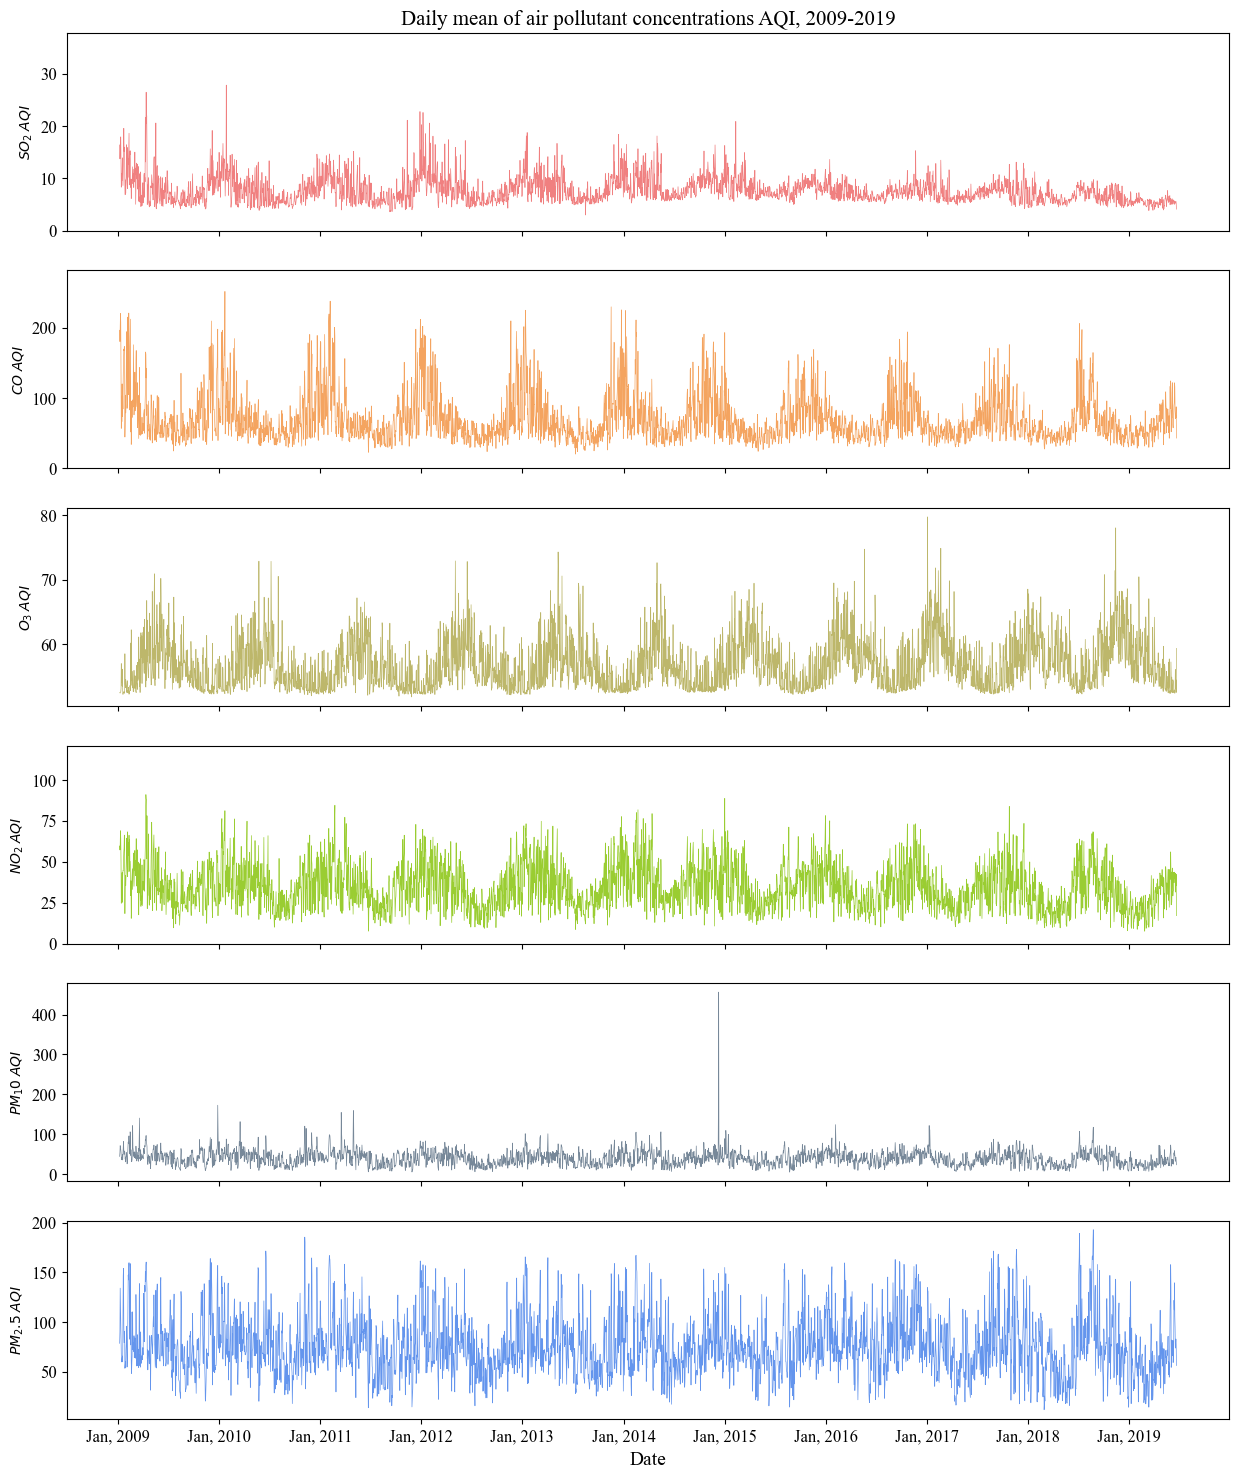

In [45]:
import matplotlib.dates as mdates
# plt.rcParams['font.family'] = 'Times New Roman'

# Create figure and add axes object
fig = plt.figure(figsize=(15, 18)) # figure size

# big subplot that contains all
ax = fig.add_subplot(1, 1, 1)

# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

ax.set_xlabel('Date', fontsize = 14
)
plt.title('Daily mean of air pollutant concentrations AQI, 2009-2019', fontsize = 15)

ax1 = fig.add_subplot(6, 1, 1)
ax2 = fig.add_subplot(6, 1, 2)
ax3 = fig.add_subplot(6, 1, 3)
ax4 = fig.add_subplot(6, 1, 4)
ax5 = fig.add_subplot(6, 1, 5)
ax6 = fig.add_subplot(6, 1, 6)
# ax7 = fig.add_subplot(3, 3, 7)
# ax8 = fig.add_subplot(3, 3, 8)
# ax9 = fig.add_subplot(3, 3, 9)
# ax10 = fig.add_subplot(4, 3, 10)
# ax11 = fig.add_subplot(4, 3, 11) 
# ax12 = fig.add_subplot(4, 3, 12)
# ax13 = fig.add_subplot(5, 3, 13)
# ax14 = fig.add_subplot(5, 3, 14)
# ax15 = fig.add_subplot(5, 3, 15)

# font size
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# so2_AQI
# ax1.set_title('Multivariate (without IV)', loc='left', fontweight = 'bold')
ax1.plot(data['date'], data['so2_AQI_mean_by_idx'], linewidth = 0.5, color='lightcoral')
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=366))
# ax1.set_yticks(range(len(dataset)),list(dataset['category']))
ax1.set_ylabel(r'$SO_2$' + ' ' + r'$AQI$')
ax1.set_xticklabels([])
ax1.set_ylim([0, data['so2_AQI_mean_by_idx'].max() + 10])
# ax1.set_xlim([0.8, 1.5])
# ax1.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax1.text(3950, 28, r'$SO_2$' + ' AQI', verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# co_AQI
# ax1.set_title('Multivariate (without IV)', loc='left', fontweight = 'bold')
ax2.plot(data['date'], data['co_AQI_mean_by_idx'], linewidth = 0.5, color='sandybrown')
ax2.xaxis.set_major_locator(mdates.DayLocator(interval=366))
# ax1.set_yticks(range(len(dataset)),list(dataset['category']))
ax2.set_ylabel(r'$CO$' + ' ' + r'$AQI$')
ax2.set_xticklabels([])
ax2.set_ylim([0, data['co_AQI_mean_by_idx'].max() + 30])
# ax1.set_xlim([0.8, 1.5])
# ax1.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax1.text(3950, 28, r'$SO_2$' + ' AQI', verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# o3_AQI
# ax1.set_title('Multivariate (without IV)', loc='left', fontweight = 'bold')
ax3.plot(data['date'], data['o3_AQI_mean_by_idx'], linewidth = 0.5, color='darkkhaki')
ax3.xaxis.set_major_locator(mdates.DayLocator(interval=366))
# ax1.set_yticks(range(len(dataset)),list(dataset['category']))
ax3.set_ylabel(r'$O_3$' + ' ' + r'$AQI$')
ax3.set_xticklabels([])
# ax3.set_ylim([0, data['o3_AQI_mean_by_idx'].max() + 30, 20])
# ax1.set_xlim([0.8, 1.5])
# ax1.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax1.text(3950, 28, r'$SO_2$' + ' AQI', verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# no2_AQI
# ax1.set_title('Multivariate (without IV)', loc='left', fontweight = 'bold')
ax4.plot(data['date'], data['no2_AQI_mean_by_idx'], linewidth = 0.5, color='yellowgreen')
ax4.xaxis.set_major_locator(mdates.DayLocator(interval=366))
# ax1.set_yticks(range(len(dataset)),list(dataset['category']))
ax4.set_ylabel(r'$NO_2$' + ' ' + r'$AQI$')
ax4.set_xticklabels([])
ax4.set_ylim([0, data['no2_AQI_mean_by_idx'].max() + 30])
# ax1.set_xlim([0.8, 1.5])
# ax1.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax1.text(3950, 28, r'$SO_2$' + ' AQI', verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# pm10_AQI
# ax1.set_title('Multivariate (without IV)', loc='left', fontweight = 'bold')
ax5.plot(data['date'], data['pm10_AQI_mean_by_idx'], linewidth = 0.5, color='lightslategray')
ax5.xaxis.set_major_locator(mdates.DayLocator(interval=366))
# ax1.set_yticks(range(len(dataset)),list(dataset['category']))
ax5.set_ylabel(r'$PM_10$' + ' ' + r'$AQI$')
ax5.set_xticklabels([])
# ax5.set_ylim([0, data['pm10_AQI_mean_by_idx'].max() + 30])
# ax1.set_xlim([0.8, 1.5])
# ax1.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax1.text(3950, 28, r'$SO_2$' + ' AQI', verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)

# pm25_AQI
# ax1.set_title('Multivariate (without IV)', loc='left', fontweight = 'bold')
ax6.plot(data['date'], data['pm25_AQI_mean_by_idx'], linewidth = 0.5, color='cornflowerblue')
ax6.xaxis.set_major_locator(mdates.DayLocator(interval=366))
# ax1.set_yticks(range(len(dataset)),list(dataset['category']))
ax6.set_ylabel(r'$PM_2.5$' + ' ' + r'$AQI$')
ax6.set_xticklabels([])
ax6.set_xticklabels(['Jan, 2009', 'Jan, 2010', 'Jan, 2011', 'Jan, 2012', 'Jan, 2013', 'Jan, 2014', 'Jan, 2015', 'Jan, 2016', 'Jan, 2017', 'Jan, 2018', 'Jan, 2019'])
# ax5.set_ylim([0, data['pm10_AQI_mean_by_idx'].max() + 30])
# ax1.set_xlim([0.8, 1.5])
# ax1.vlines(1, ymin=0, ymax=6, linestyles='dashed',color='gray')
# mybox={'facecolor':'white','edgecolor':'gray','boxstyle':'round','alpha':0.5}
# ax1.text(3950, 28, r'$SO_2$' + ' AQI', verticalalignment='top', horizontalalignment='right', fontsize = 12, bbox=mybox)


# plt.subplots_adjust(left=0.125,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.1, 
#                     hspace=0.15)

plt.savefig('D:\\SNUlab\\1. Results\\IV_OHCA\\figures\\AQI_visualize.png', facecolor = 'w', bbox_inches = "tight") # save 

plt.show()